In [2]:
EXPLAINED_VARIANCE_THRESHOLD = 0.99;

# 2016 data

In [10]:
datapath = '../../box/Data/Yellowstone';
load([datapath filesep 'preprocessed_data_2016.mat'])

In [11]:
[principal_components, transformed_data, variances] = pca(xpol_processed');
transformed_data = transformed_data'; % transpose so observations are column vectors like in the original data

Find how many principal components are needed to explain 99% of the variance


num_components =

    15



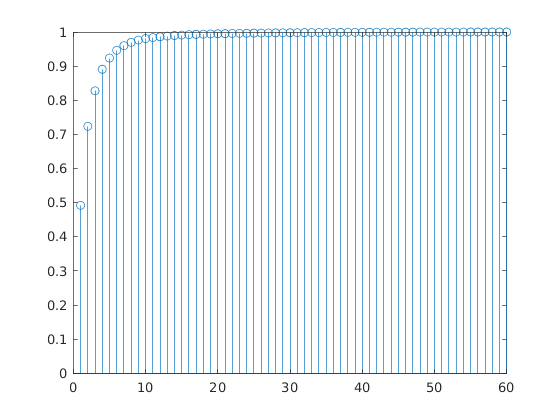

In [12]:
explained_variance = cumsum(variances/(sum(variances)));
stem(explained_variance)
num_components = find(explained_variance >= EXPLAINED_VARIANCE_THRESHOLD, 1)

Project the data onto the new `num_components` principal components and save the data

In [13]:
% projected_data = principal_components(:, 1:num_components)' * (xpol_processed - mean(xpol_processed, 2));
% norm(projected_data - transformed_data(1:num_components,:))
projected_data = transformed_data(1:num_components, :);
save([datapath filesep 'pca_transformed_data_2016.mat'], 'projected_data', 'labels');

# 2015 Data

In [14]:
datapath = '../../box/Data/Yellowstone';
load([datapath filesep 'preprocessed_data_2015.mat'])

In [15]:
[principal_components, transformed_data, variances] = pca(xpol_processed');
transformed_data = transformed_data'; % transpose so observations are column vectors like in the original data

Find how many principal components are needed to explain 99% of the variance


num_components =

    35



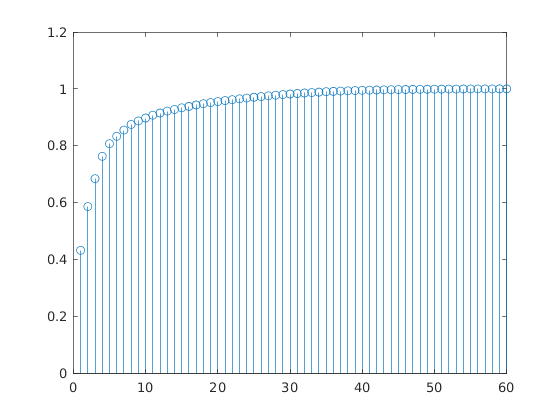

In [16]:
explained_variance = cumsum(variances/(sum(variances)));
stem(explained_variance)
num_components = find(explained_variance >= EXPLAINED_VARIANCE_THRESHOLD, 1)

Project the data onto the new `num_components` principal components and save the data

In [17]:
% projected_data = principal_components(:, 1:num_components)' * (xpol_processed - mean(xpol_processed, 2));
% norm(projected_data - transformed_data(1:num_components,:))
projected_data = transformed_data(1:num_components, :);
save([datapath filesep 'pca_transformed_data_2015.mat'], 'projected_data', 'labels')

# Testing on full 2016 data
Rather than performing PCA on the data that has already been reduced by removing empty rows that are beyond the lidar's penetration, perform PCA on the full dataset and compare the differences

In [18]:
box_dir = '/mnt/data/trevor/research/afrl/box/Data/Yellowstone';

data_filenames = {'yellowstone_wfov_20160928.processed.h5'};
labels_filenames = {'fish_hits_2016_with_school_size_estimates.csv'};

% number of rows above the surface of the water to start the image
SURFACE_PAD = 0;


data_path = [box_dir filesep data_filenames{1}];
xpol_data = h5read(data_path, '/crosspol/radiance');             
surf_idx = h5read(data_path, '/info/surface_index');
distance = h5read(data_path, '/location/distance');
    
preprocessed_data = normalize_surface_height(xpol_data, surf_idx, SURFACE_PAD);

In [19]:
[principal_components2, transformed_data2, variances2] = pca(preprocessed_data');
transformed_data2 = transformed_data2'; % transpose so observations are column vectors like in the original data


num_components2 =

    22



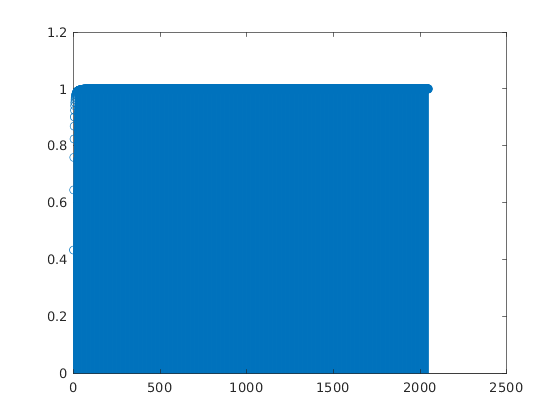

In [20]:
explained_variance2 = cumsum(variances2/(sum(variances2)));
stem(explained_variance2)
num_components2 = find(explained_variance2 >= EXPLAINED_VARIANCE_THRESHOLD, 1)

The principal components aren't quite the same, but the first 16 are relatively similar. I think it's probably better to remove the rows that we absolutely know do not contain informative data first before doing PCA